In [1]:
%matplotlib inline

## conda install seaborn

## 背景&目标

利用波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对房屋做特定预测—尤其是对房屋的价值。对于房地产经纪等人的日常工作来说，这样的预测模型被证明非常有价值。

### **目标：用一些已有特征，比如房屋面积、建成年份、车库容量、供暖方式、公共设施情况、装修情况等80个特征，进行房价预测**

---
# Data Exploration

**搞机器学习，对数据和业务的认识很重要**，所以下面就先来看看数据长什么样子，以及数据可视化中常用的方法和工具，python中数据的读取以及处理的瑞士军刀非pandas莫属，而可视化有matplotlib和seaborn两个方便的工具

In [77]:
from __future__ import print_function
import numpy as np
import pandas as pd
import seaborn as sns

## Loading Data
这里直接将train data和test data放到一个DataFrame中，方便后面做哑编码时train和test对应关系乱掉，当然也可以只用train data进行分析，这里只是为了后面预处理的时候方便些

In [78]:
df_train = pd.read_csv('data/train.csv',index_col=0)
df_test = pd.read_csv('data/test.csv',index_col=0)
df_features = pd.concat([df_train, df_test], keys=['train', 'test'])

In [79]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Basic Info

pandas中有几个常用的方法可以查看数据的整体情况：
- **DataFrame.head()** : 查看DataFrame的开头几行，对数据有个大概了解
- **DataFrame.describe()** : 查看DataFrame中数值型数据的基本统计信息，包括数量、均值、方差、最大最小值、百分位数
- **DataFrame.info()** : 查看DataFrame中每个字段的数据缺失情况，以及字段的数据类型
- **DataFrame.get_dtype_counts()** : 各个数据类型的个数
- **DataFrame.shape**: 数据的维度，即样本量和特征个数
- **DataFrame.size**: 数据个数，也就是【样本量*特征个数】

对于本例的房价数据，用以上方法可以看到数据共有80个特征，其中有43个是category类型（需要哑编码），34个是整型，另外3个是float类型。

In [80]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2.1 数据再分类
为了让我们对数据的分析更具科学性，我们可以新建一个excel文件，具体需要记录的数据如下：

- **Variable**：变量名
- **Data Type**：各变量的数据类型，分为“数值型--0”和“类别型--1”
- **Segment**：变量的类型。分为：“building--0”、“space--1”、“location--2”。具体解释如下：
    - **building**：比如房屋材料、造型等与房屋物理特性相关的特征（e.g. 'OverallQual'）
    - **space**：即与房屋空间有关的特征，如面积(e.g. 'TotalBsmtSF')
    - **location**：如地段、道路情况等(e.g. 'Neighborhood')
- **Expectation**：表示我们认为该变量对于“SalePrice”的影响程度，划分为“High---3”，“Medium---2”，“Low---1”
- **Conclusion**：与“Expectation”类似，这个表示我们在观察完数据后得出的结论，其实也可和“Expectation”相同。
- **Comments**：其他关于该变量的一些看法

**主要特征**


我已经完成了任务，下面将会对整理后的数据进一步分析来选出主要影响售价的特征。
- **Utilities**：第一个映入我眼帘的是**Utilities**，因为公共设施越齐全肯定越贵嘛，但是我又观察了具体的训练数据集，发现每一个房屋都是“AllPub”，即都具备基础的公共设施，所以这一项不能入选。
- **LotArea**：英文理解能力有限，姑且认为是“**地皮面积**”，很好理解，面积越大肯定越贵嘛。。。
- **Neighborhood**：这应表示房屋所处市区的位置，合不合适在后面再具体分析。
- **OverallQual**：对房子的整体材料和装修进行评估
- **YearBuilt**：建造年份
- **TotalBsmtSF**&**GrLivArea**：训练数据中有很多特征都涉及到了面积，所以没必要每个都考虑进去，为了简化，选择了**TotalBsmtSF（地下室面积）**&**GrLivArea（生活面积）**
- **Heating**：供暖方式应该很重要，但是数据显示基本上都是**GasA**类型，所以不予考虑，
- **CentralAir**：中央空调这个可以考虑一下，因为有的有，有的没有。
- **MiscVal**: 在其他类别中未涉及的其他功能的价值，一般都是“shed（棚子）”，价格在400-1500美元之间，可以考虑一下
- **GarageCars**&**GarageArea**：车库可容纳的车辆数以及其面积，这个可以算成单位车辆拥有的面积来计算



## Checking for NANs
对于机器学习来说，对NAN的处理是非常重要的，NAN不处理掉，后面都无法训练数据。先来瞅一眼train和test中各个特征的缺失率，从下表可以看到，PoolQC、MiscFeature、Alley、Fence这几个特征的缺失率特别的高，FireplaceQu也达到了50左右，在预处理的时候可以考虑将这几个特征删除掉

In [81]:
NANs = pd.concat([df_train.dtypes, df_train.isnull().sum(), df_train.isnull().sum()/df_train.shape[0], 
                  df_test.isnull().sum(), df_test.isnull().sum()/df_test.shape[0]], 
                 axis = 1, keys=['dtype','Train', 'Train_percentage', 'Test', 'Test_percentage'])
NANs_sort = NANs.sort_values(['Train_percentage','Test_percentage'], axis=0, ascending=False)
# NANs_sort[(NANs_sort.Train>0) | (NANs_sort.Test>0)] #print the NAN count greater than zero
NANs_sort

,dtype,Train,Train_percentage,Test,Test_percentage
PoolQC,object,1453,0.995205,1456.0,0.997944
MiscFeature,object,1406,0.963014,1408.0,0.965045
Alley,object,1369,0.937671,1352.0,0.926662
Fence,object,1179,0.807534,1169.0,0.801234
FireplaceQu,object,690,0.472603,730.0,0.500343
LotFrontage,float64,259,0.177397,227.0,0.155586
GarageCond,object,81,0.055479,78.0,0.053461
GarageFinish,object,81,0.055479,78.0,0.053461
GarageQual,object,81,0.055479,78.0,0.053461
GarageYrBlt,float64,81,0.055479,78.0,0.053461


## Data Visualization

**0. target visualization**

拿到一个机器学习任务，首先看看其目标变量长生么样子，对于预测任务，可以通过`seaborn.distplot`查看其直方图，对于分类任务可以用`seaborn.countplot`来查看各个分类的数量情况

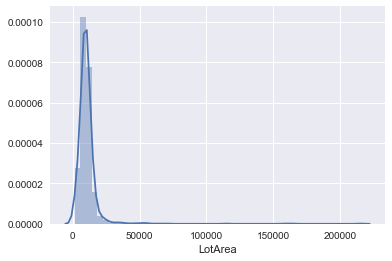

In [82]:
sns.distplot(df_train.LotArea)

房价预测这个例子中要求使用对目标变量求log之后计算RMSE，那么再来看看取log之后的分布情况：

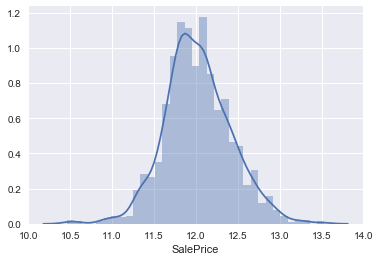

In [83]:
sns.distplot(np.log(df_train.SalePrice))

在一个机器学习任务中，通常会有多种数据类型，主要可以分为两类：**numerical type**和**categorical type**，对于两种类型的数据需要才有用不同的可视化方法去查看其分布规律，seaborn中对于两种数据类型都提供了简便的可视化方法。

**1. numeric type visualization**

对于**numerical type**，我们比较关心的是每个特征与目标变量，特征与特征之间的关系以及分布情况，同时采用散点图的方式，可以直观的查看出异常点。seaborn中常用的numerical type可视化方法有：`pairplot`,`jointplot`, `lmplot`等等。对于`pairplot`，如果特征特别多（如本例），不建议一起绘制出来，那样速度太慢，分开绘制会比较好。这里简单的列举几个特征与目标变量Y之间的散点图

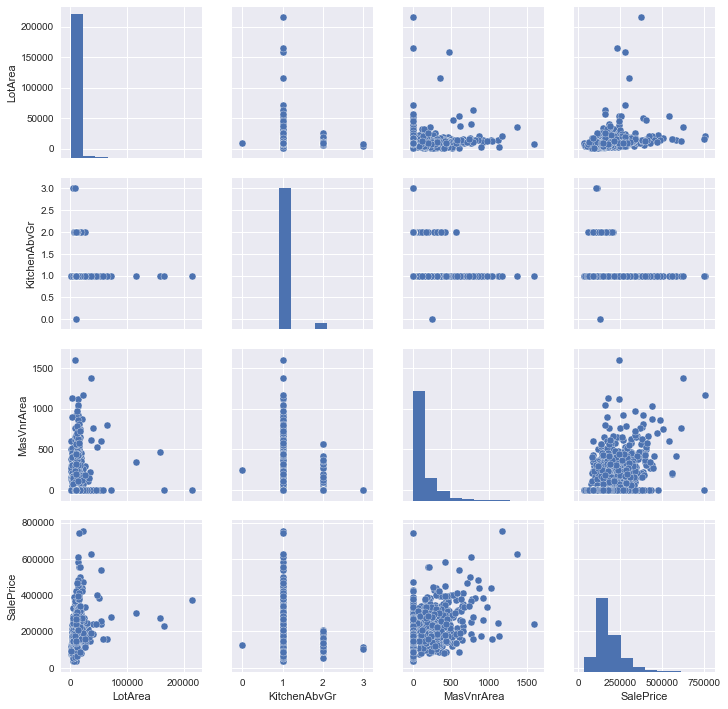

In [84]:
numeric_columns = df_train.dtypes[df_train.dtypes != 'object'].index  #get the numeric columns for visualization
# numeric_columns = numeric_columns.drop(['SalePrice']) #drop the target column

sns.pairplot(df_train[['LotArea', 'KitchenAbvGr','MasVnrArea','SalePrice']].dropna())  #如果feature数量比较少，可以直接用numeric_columns
# 注：这里seaborn自带的dropna不起作用，详见：https://github.com/mwaskom/seaborn/issues/1087

**2. numeric与target相关系数**

通过相关系数（皮尔逊相关系数）可视化关系图，可以numeric type的特征之间的关联程度，包括以target、各个feature之间的关联程度，虽然没有上面的散点图直观，当时可以纵观全局，并且有具体的数值，再通过上面的散点图（pairplot）以及线性回归图（lmplot）探索变量间的具体情况

在选特征或者后续处理中，应该选择与目标变量相关系数高的特征，特征之间的相关系数如果比较高，那么需要考虑**降维**处理。

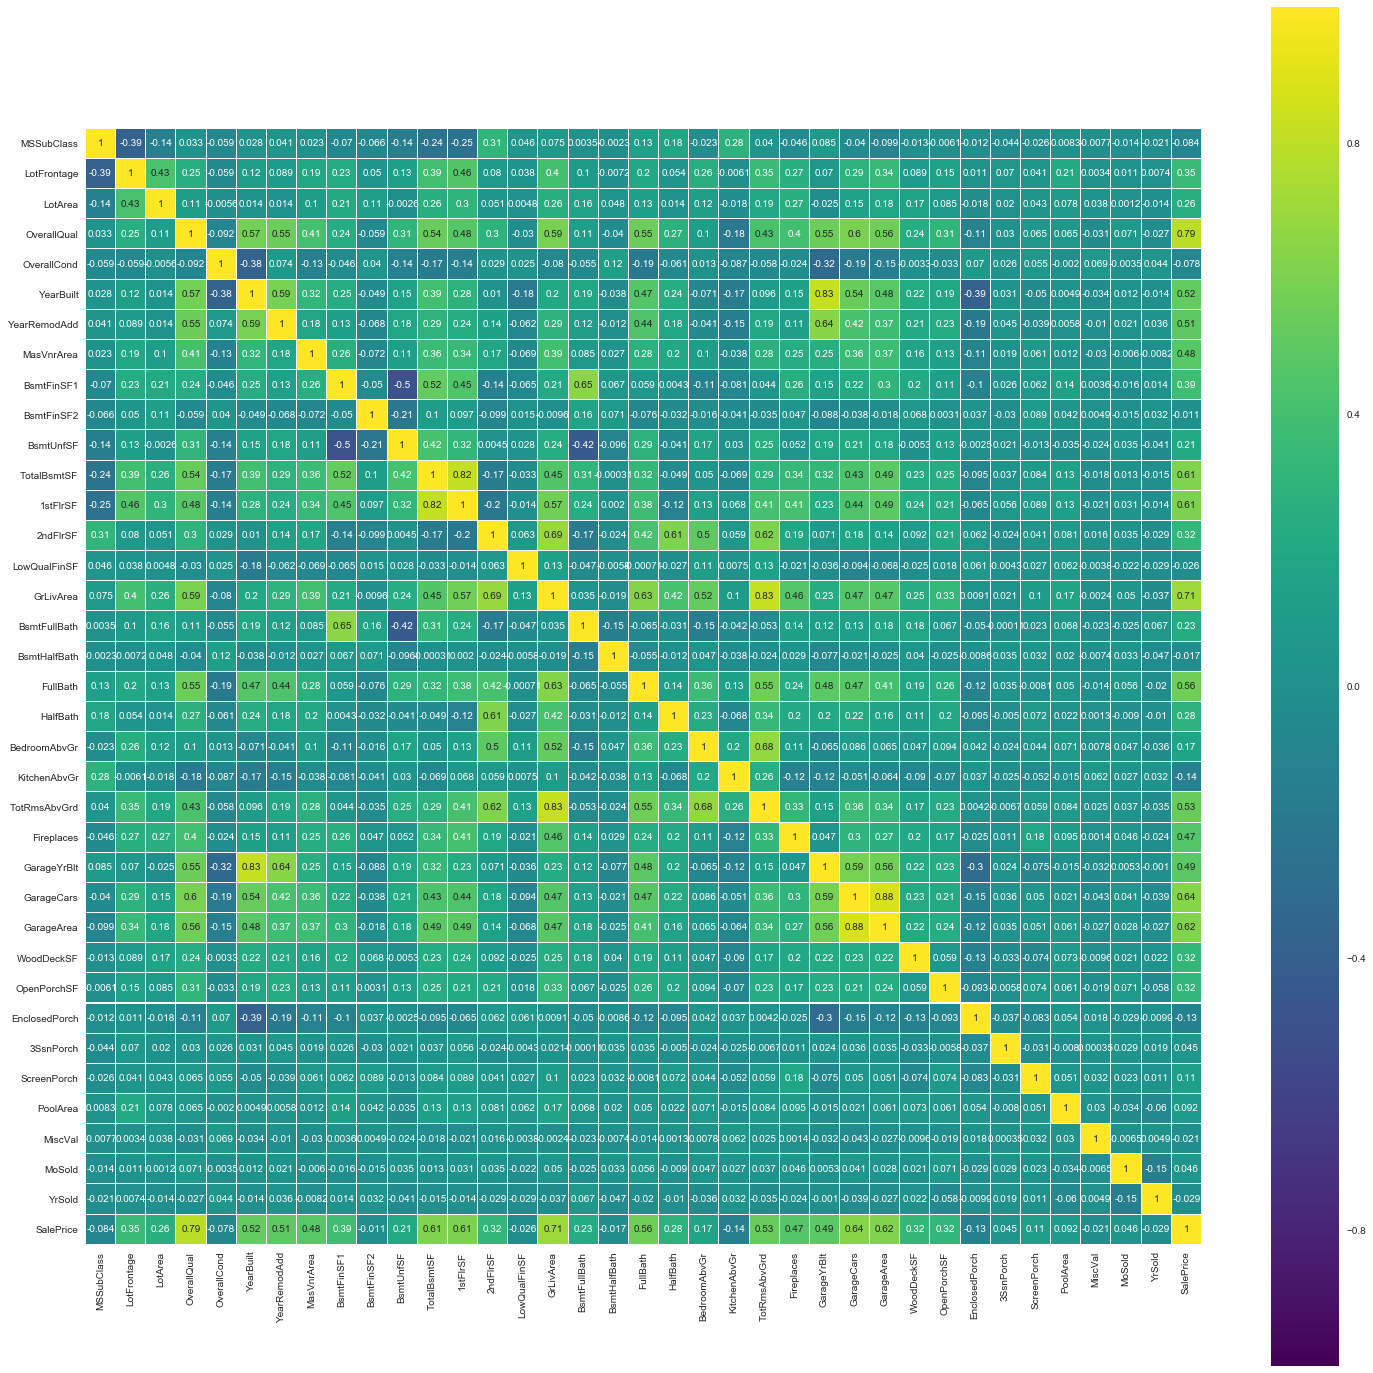

In [85]:
corrmat = df_train[numeric_columns].corr()
lm = sns.heatmap(corrmat,vmax=1, linewidths=0.01, square=True,annot=True,cmap='viridis',linecolor="white")
lm.figure.set_size_inches(25,25)

**4. visualize relation between each feature and target**

通过上面整体的对数据进行一些洞察之后，我们可以挑选比较重要的数据进行分析，看看其与target之间的具体关系

比如OverallQual（房子的整体材料和装修评估）与价格的皮尔逊相关系数高达0.79，可以拿出来具体看看

In [86]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [87]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

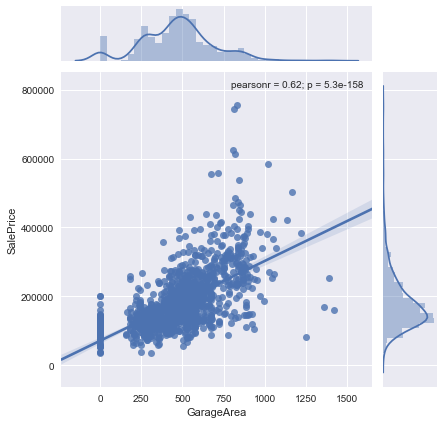

In [88]:
sns.jointplot(x="GarageArea", y="SalePrice", data=df_train, kind="reg");

---
# Data Preprocessing


Data Preprocessing理论上应当归于与Feature Engineering，而特征工程包括了太多的内容，这里主要讲一下其中的预处理部分，等以后经验多了在总结总结特征工程这一部分。

数据预处理这一步，很大程度上依赖于前面的Data Exploration，常见的处理过程有：
- Missing Data: 缺失值处理
- Outlier: 异常值/离群点
- Encoding: categorical type 编码

## Missing Data

这里采用简单的填充方式，用均值、众数、中位数等形式填充，更好的方法应该结合每个feature的特点去填充相应的missing data

**1. 删除NAN特别多的字段**

In [89]:
df_features.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

**2. fill NAN(categorical type)**

In [90]:
for item in df_features.dtypes[df_features.dtypes == 'object'].index:
    mode = df_features[item].mode()[0]
    df_features[item].fillna(mode,inplace=True)

**3. fill NAN(numerical type)**

In [91]:
for item in df_features.dtypes[df_features.dtypes == 'float64'].index:
    print(item)

BsmtFinSF1
BsmtFinSF2
BsmtFullBath
BsmtHalfBath
BsmtUnfSF
GarageArea
GarageCars
GarageYrBlt
LotFrontage
MasVnrArea
SalePrice
TotalBsmtSF


In [93]:
for item in df_features.dtypes[df_features.dtypes == 'float64'].index:
    mode = df_features[item].mean()
    df_features[item].fillna(mode,inplace=True)

## encoding categorical features

对于[categorical type](https://en.wikipedia.org/wiki/Categorical_variable)，是无法直接用于训练模型的，需要进一步处理成数值型，才可以用于后续操作。常用的encoding方式有两种：**LabelEncoder**、**OneHotEncoder**，sklearn中对这两种方式都做了实现，pandas中用get_dummies方法实现。在机器学习中用的最多的是哑编码（也就是Dummy coding或OneHotEncoder）, 当然如果某个特征的取值有成百上千个，用Dummy coding这种方式显然就不合适了，最好的方式是用LabelEncoder，或者更具这个特征的分布特征，把重要的几个取值和剩余的取值进行哑编码。

In [94]:
# pandas方式
df_features_encode = pd.get_dummies(df_features)

In [95]:
df_features_encode.head()

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
      Id                                                                        
train 1        856       854          0             3       706.0         0.0   
      2       1262         0          0             3       978.0         0.0   
      3        920       866          0             3       486.0         0.0   
      4        961       756          0             3       216.0         0.0   
      5       1145      1053          0             4       655.0         0.0   

          BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  \
      Id                                                         
train 1            1.0           0.0      150.0              0   
      2            0.0           1.0      284.0              0   
      3            1.0           0.0      434.0              0   
      4            1.0           0.0      540.0            272   
      5            1.0           0.0      490.0              0   

                ...         SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  \
      Id        ...                                                          
train 1         ...                      0               0               0   
      2         ...                      0               0               0   
      3         ...                      0               0               0   
      4         ...                      0               0               0   
      5         ...                      0               0               0   

          SaleType_New  SaleType_Oth  SaleType_WD  Street_Grvl  Street_Pave  \
      Id                                                                      
train 1              0             0            1            0            1   
      2              0             0            1            0            1   
      3              0             0            1            0            1   
      4              0             0            1            0            1   
      5              0             0            1            0            1   

          Utilities_AllPub  Utilities_NoSeWa  
      Id                                      
train 1                  1                 0  
      2                  1                 0  
      3                  1                 0  
      4                  1                 0  
      5                  1                 0  

[5 rows x 276 columns]

In [14]:
# sklearn方式
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])

# enc.fit_transform(df_train)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

---
# Training Model

In [96]:
# from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn import metrics, linear_model
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn import ensemble, svm, preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

prepare the trainning data

In [97]:
y = df_features_encode.loc['train',['SalePrice']]
y = np.log(y['SalePrice'])
X = df_features_encode.loc['train',:].copy()
X.drop('SalePrice', axis=1, inplace=True)

### Split Train and validation data
一部分用于训练，一部分用于验证模型的泛化能力，这里训练集和测试集比例为8:2

In [99]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(1168, 275) (292, 275) (1168,) (292,)


In [100]:
y_train.head()

Id
1272    12.132157
1358    11.917724
615     11.231888
548     11.771436
1090    12.190959
Name: SalePrice, dtype: float64

## Feature Selection

如果参数太多，也可以通过SelectKBest选出最相关的参数

In [101]:
# X_new = SelectKBest(f_regression, k=20).fit_transform(X_train, y_train)

## Training Model

In [102]:
y_train.head()

Id
1272    12.132157
1358    11.917724
615     11.231888
548     11.771436
1090    12.190959
Name: SalePrice, dtype: float64

In [103]:
X_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
Id,,,,,,,,,,,,,,,,,,,,,
1272,1489,0,0,3,0.0,0.0,0.0,0.0,1489.0,0,...,0,0,0,0,0,1,0,1,1,0
1358,1078,0,0,3,734.0,0.0,1.0,0.0,344.0,0,...,0,0,0,0,0,1,0,1,1,0
615,630,0,0,1,150.0,480.0,1.0,0.0,0.0,0,...,0,0,0,0,0,1,0,1,1,0
548,768,0,0,2,619.0,0.0,1.0,0.0,149.0,0,...,0,0,0,0,0,1,0,1,1,0
1090,1247,0,0,1,1039.0,0.0,1.0,0.0,208.0,0,...,0,0,0,0,0,1,0,1,1,0


In [104]:
from sklearn import linear_model
model =  linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
# 训练集得分
model.score(X_train,y_train)

0.9461313074610485

In [106]:
# 验证集得分
model.score(X_valid,y_valid)

0.9071462989769494

In [107]:
# 验证集误差RMSE
y_pred = model.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

0.13252592846466582

In [108]:
# 真值与预测值对比
list(zip(list(np.exp(y_valid)), list(np.exp(y_pred))))

[(109900.00000000003, 121853.0419712835),
 (336999.9999999999, 313528.5238157102),
 (230000.0000000002, 199116.0583855579),
 (109999.99999999991, 94811.18566423787),
 (275000.00000000006, 293508.99480025715),
 (79900.00000000003, 102004.81015432745),
 (319899.99999999977, 282522.5862706558),
 (144000.00000000012, 150981.7744961891),
 (136500.0000000001, 131050.86149658413),
 (241499.99999999983, 220475.75798446004),
 (60000.00000000002, 43244.42060459125),
 (224000.0000000001, 219230.2047008775),
 (124999.99999999991, 105171.95224639044),
 (122000.0000000001, 124386.85977374382),
 (301500.00000000023, 296990.42444939475),
 (213500.00000000017, 200990.85578125808),
 (89499.99999999997, 96470.19182734056),
 (200999.99999999994, 188550.1245708883),
 (232000.00000000015, 222547.35659052816),
 (191999.99999999994, 207402.06677311967),
 (129000.00000000006, 141662.96759538984),
 (135000.00000000012, 132708.93557283617),
 (151000.0000000001, 170308.82417723496),
 (84900.0, 96351.54411784039),

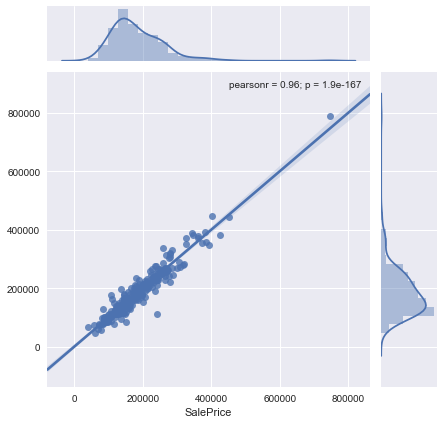

In [23]:
# 真值和预测值对比结果
sns.jointplot(np.exp(y_valid), np.exp(y_pred), kind="reg");

## Tuning Parameters

调参是搞机器学习的人最津津乐道的部分，调参的方式有很多种，可以自己手动设置参数范围，用for循环来调参，不过这总方式太原始了，sklearn中提供了[GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)和[RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)两种调参方法。

In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_jobs=-1)
params = {
    'max_features': [0.25, 0.5, 0.7],
    'max_depth' : [ 2,5,10,20],
    'n_estimators': [50, 100, 200]
}
gs = GridSearchCV(cv=5, param_grid=params, estimator=rfr, verbose=0)
gs.fit(X_train,y_train)
print(gs.best_params_, gs.best_score_)

{'max_depth': 10, 'max_features': 0.25, 'n_estimators': 200} 0.8719912831466471


In [26]:
bst_model = RandomForestRegressor(max_depth=20, max_features=0.25, n_estimators=200)
bst_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
# 验证集误差RMSE
y_pred = bst_model.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

0.14080674991310593

---
# Prediction

In [24]:
X_predict = df_features_encode.loc['test',:].copy()
X_predict.drop('SalePrice',axis = 1, inplace=True)

In [26]:
rf = ensemble.RandomForestRegressor(max_features= 0.4, n_estimators=366, min_samples_leaf= 0.1)
rf.fit(X_train,y_train)
y_pred = np.exp(rf.predict(X_predict))
pd.Series(y_pred).to_csv('y_pred2.csv')